#Confronto fra RAG e Fine-tuning

In [ ]:
!pip install pypdf
!pip install langchain
!pip install openai==0.28.1
!pip install chromadb
!pip install tiktoken
!pip install pinecone-client
!pip install python-dotenv

In [2]:
from google.colab import drive, files
import os
from dotenv import load_dotenv, find_dotenv
drive.mount("/content/drive/", force_remount=False)
%cd "/content/drive/My Drive/"
load_dotenv('./Lab_Python/.env')

Mounted at /content/drive/
/content/drive/My Drive


True

In [3]:
import pandas as pd

fine_tuning_dataset = pd.read_json("./Tesi/fine_tune_improved.json")
dataset_query = pd.read_json("./Tesi/prova_domande_fine_tuning.json")

In [23]:
query1 = fine_tuning_dataset.prompt[0]
print(query1)

Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia? in riferimento al documento: 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf'


In [24]:
fine_tuning_dataset.head(32)

,prompt,completion
0,Qual è il modo per partecipare all'Avviso Micr...,L'Avviso MicroPrestito della Regione Puglia è ...
1,Quale documentazione è necessaria per la prese...,"Per presentare la domanda di agevolazione, è n..."
2,Quali sono le categorie di soggetti che posson...,La misura NIDI offre un aiuto per l'avvio di u...
3,Quali sono i codici ATECO ammissibili per le i...,I codici ATECO ammissibili per le imprese conf...
4,Qual è l'agevolazione prevista per gli investi...,Per le iniziative in continuità con imprese pr...
5,Quali sono le modalità per accedere alle agevo...,di Puglia Sviluppo S.p.A.\nLe agevolazioni del...
6,Quali servizi sono offerti dagli sportelli inf...,Sul sito www.sistema.puglia.it/nidi è possibil...
7,Quali sono i requisiti per le imprese che inte...,Le imprese che intendono accedere al Titolo II...
8,Quali sono le attività economiche ammissibili ...,Sono ammissibili a beneficiare dell'agevolazio...
9,Quali spese non sono ammissibili alle agevolaz...,Non sono ammissibili alle agevolazioni previst...


In [ ]:
import datetime
current_date = datetime.datetime.now().date()
if current_date < datetime.date(2023, 9, 2):
    llm_name = "gpt-3.5-turbo-0301"
else:
    llm_name = "gpt-3.5-turbo"
print(llm_name)

gpt-3.5-turbo


In [ ]:
import os
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.langchain.plus"
os.environ["LANGCHAIN_API_KEY"] = "ls__0554eeed658141b4a601195abd6c737d"

In [ ]:
import os
from langchain.document_loaders import PyPDFLoader

pdf_directory = "Tesi/Documenti"

pdf_files = [file for file in os.listdir(pdf_directory) if file.endswith('.pdf')]

docs = []

for pdf_file in pdf_files:
  file_path = os.path.join(pdf_directory, pdf_file)

  loader = PyPDFLoader(file_path)
  loaded_docs = loader.load()

  for doc in loaded_docs:
      doc.metadata["source"] = pdf_file
      docs.append(doc)


In [ ]:
print(docs[118])

page_content=' \n  \n \n05 ottobre  2023 Pag 3 di 3 Centro Servizi Sistema Pug lia \nwww.sistema.puglia.it  \n Inoltre, nella stessa pagina web sarà pubblicato il docu mento “ ITER PROCEDURALE ” che descrive , \nsinteticamente e step -to-step, la proced ura operativa per l’inoltro dell a candidatura . \nIl candidato, nella fase di presentazione dell’istanza, dovrà obbligatoriamente , a pena di esclusione , \nallegare la seguente documentazione in formato pdf:  \n• autocertificazione attestante i requisiti soggettivi di parte cipazione di cui ai punti a), b), c) e d) del \nparagrafo 3.1  (il modello verrà generato dalla procedura telematica );  \n• brochure / scheda infor mativa ufficiale del Master prescelto (o altro documento equivalente), \nrilasciata dall’Organismo attuatore, da cui p ossano evincersi tutti i requisiti previsti alle lettere a), b), \nc) e d) del paragrafo 2.1, nonché l’articolazione del percorso formativo (ore didattica frontale; ore \nstage o tirocinio; materie; nu

In [ ]:
docs[0]

Document(page_content='  \n \n14 ottobre  2021 Pag 1 di 2 Centro Servizi Sistema Puglia  \nwww.sistema.puglia.it  \n \n \nScheda: Avviso MicroPrestito  della  Regione  Puglia  \n \nInformazioni  generali  Titolo  bando  MicroPrestito  della  Regione  Puglia  \nDescrizione  L’Avviso  è stato  adottato  per far fronte  alle esigenze  delle  imprese  derivanti  dalle  \nripercussioni  economiche  causate  dall’emergenza  epidemiologia  Covid -19. La \nmisura vuole garantire la continuità dell’operatività aziendale  e la salvaguardia \ndell’occupazione.  \nLe disposizioni  dell’Avviso  sono  conformi  all’approvazione  dell’Aiuto  di Stato  SA. \n57021 -Italia -Covid19 regime quadro del 21 maggio 2020 da parte della  \nCommissione  europea  ai sensi dell’art.  108 del TFUE e  s.m.i.  \nRisultati  attesi  La misura  sostiene  l’accesso  al credito  attraverso  interventi  di micro -finanza  \nche consistono  in mutui  concessi  a tasso zero  e senza  garanzie.  \nDestinatari  Il sistema  ec

In [ ]:
print(len(docs))

119


In [ ]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

# create the length function
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)

In [ ]:
token_counts = [tiktoken_len(doc.page_content) for doc in docs]

In [ ]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 99
Avg: 834
Max: 1398


Osserviamo il numero di token per ciascuna delle frasi e notiamo che la maggior parte delle completion ha intorno agli 800 token

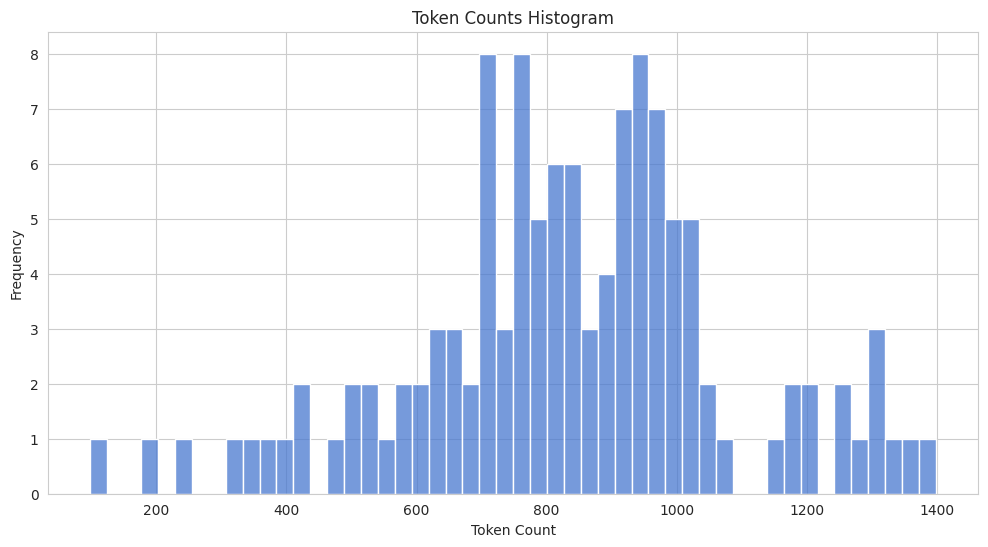

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

Splittiamo i documenti ognuno in chunk da 400 token usando la lenght_function = tiktoken_len

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=20,
    length_function=tiktoken_len,
    separators=['\n\n', '\n', ' ', '']
)


split_docs = []

for document in docs:
  metadata = document.metadata
  page_content = document.page_content


  split_content = text_splitter.create_documents([page_content])


  for content_chunk in split_content:
    print(content_chunk)
    split_docs.append(Document(metadata = metadata, page_content = content_chunk.page_content))



In [ ]:
split_docs[3]

Document(page_content='Gli aiuti  sono  cumulabili  con altri eventuali  strumenti  emergenziali  di cui alla \nComunicazione  della  Commissione  n. 1863/2020  e ss.mm.ii.  \nRisorse  totali  stanziate  80.000.000  € Come partecipare   \n \nModalità di  \npartecipazione  \n \n La domanda di partecipazione potrà essere presentata direttamente  \ndall’impresa che chiede l’agevolazione, previa iscrizione al portale  Sistema \nPuglia al seguente indirizzo:  https://microcredito2021.sistema.puglia.it . \nLa procedura  di partecipazione  è interamente  telematica.  \nL’impresa  dovrà  essere  in possesso  di firma  digitale  ed essere titolare  \ndi conto corrente  business  anche  non dedicato esclusivamente  al progetto.', metadata={'source': 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf', 'page': 0})

In [ ]:
# split_docs[0].metadata['label'] = 'Compilazione della domanda'

In [ ]:
# for doc in split_docs:
#   if doc.metadata['source'] == 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf':
#     doc.metadata['label'] = 'Compilazione della domanda'
# split_docs[1]

Document(page_content='di conto corrente  business  anche  non dedicato esclusivamente  al progetto.', metadata={'source': 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf', 'page': 0, 'label': 'Compilazione della domanda'})

In [ ]:
# for doc in split_docs:
#   if doc.metadata['source'] == "Scheda NIDI - Nuove iniziative d'impresa_ Strumento di ingegneria finanziaria.pdf":
#     doc.metadata['label'] = 'misura massima di €5.000'
# split_docs[6].metadata

{'source': "Scheda NIDI - Nuove iniziative d'impresa_ Strumento di ingegneria finanziaria.pdf",
 'page': 3,
 'text': 'Puglia sviluppo  \nUNIONE  EUROPEA  \nFONDO  EUROPEO  DI SVILUPPO  REGIONALE  REGIONE  PUGLIA  \nDIPARTIMENTO  SVILUPPO  ECONOMICO,  \nINNOVAZIONE,  ISTRUZIONE,  \nFORMAZIONE  E LAVORO  Ministero  Sviluppo  Economico  \n4  \n Internet, servizi di posizionamento sui motori di ricerca, acquisto di spazi  \nper campagne  di Web Marketing; servizi di personalizzazione  di siti \nInternet acquisiti da impresa operante nel settore della produzione di  \nsoftware,  consulenza  informatica  e attività  connesse ; \n•  spese per l’acquisto di dispositivi di protezione individuale e collettiva . \n \nA quanto ammontano gli investimenti e le \nagevolazioni  di NIDI?  \nA. \nPer \n\uf0fc le nuove attività  \ne \n\uf0fc le imprese  già esistenti  perché beneficiarie  della  misura  “PIN  – \nPugliesi Innovativi” , \nl’investimento  proposto può avere  un valore  compreso  tra 10mila

In [ ]:
split_docs[0].metadata

{'source': 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf',
 'page': 0}

In [ ]:
print(f'Numero di chunks {len(split_docs)}')

Numero di chunks 127


###Retrieval Augmentation



inserimento o fetch del vector_store di Pinecone

In [14]:
def insert_or_fetch_embeddings(index_name, chunks):
    import pinecone
    from langchain.vectorstores import Pinecone
    from langchain.embeddings.openai import OpenAIEmbeddings

    embeddings = OpenAIEmbeddings()

    pinecone.init(api_key=os.environ.get('PINECONE_API_KEY'), environment=os.environ.get('PINECONE_ENV'))

    if index_name in pinecone.list_indexes():
        print(f'Index {index_name} esiste. Loading embeddings ... ', end='')
        vector_store = Pinecone.from_existing_index(index_name, embeddings)
        print('Ok')
    else:
        print(f'Creazione di index {index_name} e embeddings ...', end='')
        pinecone.create_index(index_name, dimension=1536, metric='cosine')
        vector_store = Pinecone.from_documents(chunks, embeddings, index_name=index_name)
        print('Ok')

    return vector_store

Scelta embedding

In [13]:
from langchain.embeddings.openai import OpenAIEmbeddings
embedding = OpenAIEmbeddings()

In [ ]:
vector = embedding.embed_query(split_docs[0].page_content)
print(len(vector))

1536


In [ ]:
def print_embedding_cost(texts):
    import tiktoken
    enc = tiktoken.encoding_for_model('text-embedding-ada-002')
    total_tokens = sum([len(enc.encode(page.page_content)) for page in texts])
    print(f'Numero totale di Token: {total_tokens}')
    print(f'Costo degli Embedding $: {total_tokens / 1000 * 0.0001:.6f}')

print_embedding_cost(split_docs)

Numero totale di Token: 99662
Costo degli Embedding $: 0.009966


In [15]:
import pinecone

pinecone.init(
    api_key=os.environ.get('PINECONE_API_KEY'),
    environment=os.environ.get('PINECONE_ENV')
)

/usr/local/lib/python3.10/dist-packages/pinecone/index.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [16]:
pinecone.list_indexes()

['embedding-bandi']

delete:

In [ ]:
indexes = pinecone.list_indexes()
for i in indexes:
  pinecone.delete_index(i)
  print('ok')

ok


In [ ]:
# index_name = 'embedding-bandi'
# if index_name not in pinecone.list_indexes():
#   pinecone.create_index(index_name, dimension=768, metric='cosine')

In [19]:
index_name = 'embedding-bandi'
vector_store = insert_or_fetch_embeddings(index_name, split_docs)

Index embedding-bandi esiste. Loading embeddings ... Ok


In [ ]:
query = query1
results = vector_store.similarity_search(query)
print(results)

[Document(page_content='Gli aiuti  sono  cumulabili  con altri eventuali  strumenti  emergenziali  di cui alla \nComunicazione  della  Commissione  n. 1863/2020  e ss.mm.ii.  \nRisorse  totali  stanziate  80.000.000  € Come partecipare   \n \nModalità di  \npartecipazione  \n \n La domanda di partecipazione potrà essere presentata direttamente  \ndall’impresa che chiede l’agevolazione, previa iscrizione al portale  Sistema \nPuglia al seguente indirizzo:  https://microcredito2021.sistema.puglia.it . \nLa procedura  di partecipazione  è interamente  telematica.  \nL’impresa  dovrà  essere  in possesso  di firma  digitale  ed essere titolare  \ndi conto corrente  business  anche  non dedicato esclusivamente  al progetto.', metadata={'page': 0.0, 'source': 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf'}), Document(page_content='Gli aiuti  sono  cumulabili  con altri eventuali  strumenti  emergenziali  di cui alla \nComunicazione  della  Commissione  n. 1863/2020  e ss.mm.

In [ ]:
for res in results:
  print(res.page_content)
  print('='*50)

Gli aiuti  sono  cumulabili  con altri eventuali  strumenti  emergenziali  di cui alla 
Comunicazione  della  Commissione  n. 1863/2020  e ss.mm.ii.  
Risorse  totali  stanziate  80.000.000  € Come partecipare   
 
Modalità di  
partecipazione  
 
 La domanda di partecipazione potrà essere presentata direttamente  
dall’impresa che chiede l’agevolazione, previa iscrizione al portale  Sistema 
Puglia al seguente indirizzo:  https://microcredito2021.sistema.puglia.it . 
La procedura  di partecipazione  è interamente  telematica.  
L’impresa  dovrà  essere  in possesso  di firma  digitale  ed essere titolare  
di conto corrente  business  anche  non dedicato esclusivamente  al progetto.
Gli aiuti  sono  cumulabili  con altri eventuali  strumenti  emergenziali  di cui alla 
Comunicazione  della  Commissione  n. 1863/2020  e ss.mm.ii.  
Risorse  totali  stanziate  80.000.000  € Come partecipare   
 
Modalità di  
partecipazione  
 
 La domanda di partecipazione potrà essere presentata diret

Definizione della chain per il RetrievalQA

In [42]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model='gpt-3.5-turbo', temperature = 0.7)
retriever = vector_store.as_retriever(search_type='similarity', search_kwargs={'k':3})
chain = RetrievalQA.from_chain_type(llm = llm, chain_type='stuff', retriever = retriever)

In [ ]:
def ask_with_memory(vector_store, question, chat_history=[]):
    from langchain.chains import ConversationalRetrievalChain # Per la conversazione va usata questa classe
    from langchain.chat_models import ChatOpenAI

    llm = ChatOpenAI(temperature=1)
    retriever = vector_store.as_retriever(search_type='similarity', search_kwargs={'k': 3})

    crc = ConversationalRetrievalChain.from_llm(llm, retriever)
    result = crc({'question': question, 'chat_history': chat_history})
    chat_history.append((question, result['answer']))

    return result, chat_history

In [ ]:
query="Di cosa si parla nel documento Scheda Efficientamento Energetico Edifici Pubblici.pdf"
answer = chain.run(query)

In [ ]:
print(query1)

Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia? in riferimento al documento: 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf'


In [ ]:
risposta_query0 = answer
print(risposta_query0)

Il documento "Scheda Efficientamento Energetico Edifici Pubblici.pdf" parla dell'avviso n. 40/2017 relativo all'Asse Prioritario IV del Programma Operativo (PO) Puglia F.E.S.R. - F.S.E. 2014-2020. L'obiettivo specifico di questo avviso è promuovere l'energia sostenibile e migliorare la qualità della vita attraverso interventi di efficientamento energetico negli edifici pubblici. 

Nel documento si forniscono informazioni sulle risorse finanziarie disponibili per tali interventi, che ammontano a € 157.891.208,00. Si specifica anche che i richiedenti possono presentare al massimo 3 richieste di finanziamento, purché si riferiscano a edifici diversi. 

Inoltre, vengono fornite le caratteristiche degli interventi finanziabili: l'importo massimo per ogni singolo intervento non deve superare € 5.000.000,00, ma per le Amministrazioni statali il limite massimo è di € 10.000.000,00 e per le ASL e aziende ospedaliere il limite massimo è di € 30.000.000,00. 

Pertanto, il documento si occupa di f

In [ ]:
query=query1
answer = chain.run(query)
answer

In [ ]:
answer1 = chain.run(query1, metadata = {'label': 'Compilazione della domanda'})
answer1

'Per partecipare all\'Avviso MicroPrestito della Regione Puglia, devi presentare la domanda di agevolazione tramite la procedura online "PIA Medie Imprese" disponibile sul sito www.sistema.puglia.it. Dovrai compilare il modulo di istanza di accesso utilizzando la modulistica fornita e apporre la firma digitale. L\'istanza di accesso deve descrivere le caratteristiche tecniche ed economiche del progetto integrato e includere la compilazione telematica richiesta dall\'Avviso e prevista dalla piattaforma telematica. Saranno effettuate delle verifiche da parte di Puglia Sviluppo e successivamente la Regione adotterà un provvedimento di ammissione o inammissibilità della proposta. Sarà comunicato l\'esito dell\'esame e, in caso di ammissibilità, saranno indicati i termini per la presentazione della documentazione progettuale.'

In [ ]:
risposta_query1 = answer
risposta_query1

"Il modo per partecipare all'Avviso MicroPrestito della Regione Puglia è presentare la domanda di partecipazione direttamente dall'impresa che richiede l'agevolazione, previa iscrizione al portale Sistema Puglia all'indirizzo https://microcredito2021.sistema.puglia.it. La procedura di partecipazione è interamente telematica. L'impresa deve essere in possesso di firma digitale ed essere titolare della stessa. Sono necessari anche alcuni documenti da produrre, tra cui la domanda di agevolazione firmata digitalmente, la dichiarazione di consenso al trattamento dei dati personali, la dichiarazione sostitutiva di atto notorio attestante il possesso dei requisiti previsti dall'Avviso, la dichiarazione sostitutiva di atto notorio attestante il rispetto degli obblighi contributivi, la documentazione fiscale dell'esercizio 2019, documentazione attestante i minori ricavi dei primi 9 mesi del 2021 rispetto al medesimo periodo del 2019 e l'estratto conto corrente aziendale dell'ultimo trimestre. S

In [ ]:
query = "Per cosa è stato adottato l'Avviso MicroPrestito della Regione Puglia, chi può parteciparvi e come? in riferimento al documento: 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf"
answer = chain.run(query)


In [ ]:
print(answer)

Il documento fornito non contiene informazioni specifiche sul modo di partecipare all'Avviso MicroPrestito della Regione Puglia. Tuttavia, nel testo è indicato che per la presentazione della domanda di agevolazione devono essere prodotti diversi documenti, tra cui la domanda di agevolazione firmata digitalmente, la dichiarazione di consenso al trattamento dei dati personali, la dichiarazione sostitutiva di atto notorio attestante il possesso dei requisiti previsti dall'Avviso, la dichiarazione sostitutiva di atto notorio attestante il rispetto degli obblighi contributivi, la documentazione fiscale dell'esercizio 2019, la documentazione attestante i minori ricavi dei primi 9 mesi del 2021 rispetto al medesimo periodo del 2019 e l'estratto conto corrente aziendale dell'ultimo trimestre. Si consiglia di consultare il sito web indicato nel documento per ottenere ulteriori informazioni sulle modalità di partecipazione all'Avviso MicroPrestito della Regione Puglia.


In [ ]:
answer

"L'Avviso MicroPrestito della Regione Puglia è stato adottato per far fronte alle esigenze delle imprese derivanti dalle ripercussioni economiche causate dall'emergenza epidemiologia Covid-19. La misura vuole garantire la continuità dell'operatività aziendale e la salvaguardia dell'occupazione. \n\nPossono partecipare al MicroPrestito della Regione Puglia le microimprese ed i lavoratori autonomi iscritti al registro delle imprese, con sede operativa in Puglia, che abbiano subito perdite di fatturato o incrementi di costi a causa dell'epidemia Covid-19 e delle relative misure di contenimento, avendo avuto nel periodo compreso tra il 1° gennaio 2021 e il 30 settembre 2021 ricavi inferiori ai ricavi del periodo dal 1° gennaio 2019 al 30 settembre 2019.\n\nLa domanda di partecipazione può essere presentata direttamente dall'impresa che chiede l'agevolazione, previa iscrizione al portale Sistema Puglia. La procedura di partecipazione è interamente telematica e l'impresa deve essere in posse

#Fine-Tuning unito al RAG

Per usare un modello fine-tuned insieme al RAG deve essere compatibile, cioè deve essere un chat-model come gpt-3.5-turbo

In [4]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

c = openai.File.create(
  file=open("./Tesi/gpt-3.5-turbo_data.jsonl", "rb"),
  purpose='fine-tune'
)

print(c)

{
  "object": "file",
  "id": "file-2PIukqb0doY8LrnTPEXcuvJN",
  "purpose": "fine-tune",
  "filename": "file",
  "bytes": 206569,
  "created_at": 1701715411,
  "status": "processed",
  "status_details": null
}


Andiamo ad avviare il fine-tuning di gpt-3.5-turbo-1106 con 4 epoche

In [5]:
#r = openai.FineTuningJob.create(training_file="file-2PIukqb0doY8LrnTPEXcuvJN", model="gpt-3.5-turbo-1106", suffix="gpt-3.5-Signorile",hyperparameters={"n_epochs":4})

print(r)

{
  "object": "fine_tuning.job",
  "id": "ftjob-Z2g8bHRfEb9HMarLTJ6GjKRl",
  "model": "gpt-3.5-turbo-1106",
  "created_at": 1701715586,
  "finished_at": null,
  "fine_tuned_model": null,
  "organization_id": "org-OF04YbDrGXeJxlDm77negXuJ",
  "result_files": [],
  "status": "validating_files",
  "validation_file": null,
  "training_file": "file-2PIukqb0doY8LrnTPEXcuvJN",
  "hyperparameters": {
    "n_epochs": 4,
    "batch_size": "auto",
    "learning_rate_multiplier": "auto"
  },
  "trained_tokens": null,
  "error": null
}


In [10]:
import openai

jobname = "ftjob-Z2g8bHRfEb9HMarLTJ6GjKRl"

r = openai.FineTuningJob.retrieve(jobname)
e = openai.FineTuningJob.list_events(id=jobname, limit=10)
print(f"status: {r}")
print("\n\n\n")
print(f"events: {e}")

status: {
  "object": "fine_tuning.job",
  "id": "ftjob-Z2g8bHRfEb9HMarLTJ6GjKRl",
  "model": "gpt-3.5-turbo-1106",
  "created_at": 1701715586,
  "finished_at": 1701716382,
  "fine_tuned_model": "ft:gpt-3.5-turbo-1106:links:gpt-3-5-signorile:8S8SNEPI",
  "organization_id": "org-OF04YbDrGXeJxlDm77negXuJ",
  "result_files": [
    "file-LNA9CLDTxOOj1pNV6hfTLu4t"
  ],
  "status": "succeeded",
  "validation_file": null,
  "training_file": "file-2PIukqb0doY8LrnTPEXcuvJN",
  "hyperparameters": {
    "n_epochs": 4,
    "batch_size": 1,
    "learning_rate_multiplier": 2
  },
  "trained_tokens": 228996,
  "error": null
}




events: {
  "object": "list",
  "data": [
    {
      "object": "fine_tuning.job.event",
      "id": "ftevent-NbJN3ZFbyDercSPx9vrLERpv",
      "created_at": 1701716386,
      "level": "info",
      "message": "The job has successfully completed",
      "data": {},
      "type": "message"
    },
    {
      "object": "fine_tuning.job.event",
      "id": "ftevent-v7XmMTVQ2iGwx

In [11]:
ft_model = 'ft:gpt-3.5-turbo-1106:links:gpt-3-5-signorile:8S8SNEPI'

Qui creo i parametri da passare ad un Agente di LangChain

In [38]:
from langchain.agents import Tool
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationBufferWindowMemory
from functools import partial

llm = ChatOpenAI(
    temperature=0.5,
    model_name=ft_model
)

memory = ConversationBufferWindowMemory(
    memory_key="chat_history",
    k=5,
    return_messages=True,
    output_key="output"
)

vdb_tool = Tool(
    name="Pinecone Vector Store",
    func=partial(vector_store.search, search_type="similarity"),
    description="Utilizza il vector store di Pinecone per cercare vettori simili.",
  )



Qui inizializzo l'Agente che conserverà in memoria anche la conversazione

In [39]:
from langchain.agents import AgentType, initialize_agent

agent = initialize_agent(
    agent=AgentType.CHAT_CONVERSATIONAL_REACT_DESCRIPTION,
    tools=[vdb_tool],
    llm=llm,
    verbose=True,
    max_iterations=3,
    early_stopping_method="generate",
    memory=memory,
    return_intermediate_steps=True
)

Devo semplicemente passare una query per ricevere una risposta

In [40]:
agent(query1)



> Entering new AgentExecutor chain...
```json
{
    "action": "Pinecone Vector Store",
    "action_input": "Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia?"
}
```
Observation: [Document(page_content='Gli aiuti  sono  cumulabili  con altri eventuali  strumenti  emergenziali  di cui alla \nComunicazione  della  Commissione  n. 1863/2020  e ss.mm.ii.  \nRisorse  totali  stanziate  80.000.000  € Come partecipare   \n \nModalità di  \npartecipazione  \n \n La domanda di partecipazione potrà essere presentata direttamente  \ndall’impresa che chiede l’agevolazione, previa iscrizione al portale  Sistema \nPuglia al seguente indirizzo:  https://microcredito2021.sistema.puglia.it . \nLa procedura  di partecipazione  è interamente  telematica.  \nL’impresa  dovrà  essere  in possesso  di firma  digitale  ed essere titolare  \ndi conto corrente  business  anche  non dedicato esclusivamente  al progetto.', metadata={'page': 0.0, 'source': 'Scheda MicroPrestito della 

{'input': "Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia? in riferimento al documento: 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf'",
 'chat_history': [],
 'output': "La domanda di partecipazione potrà essere presentata direttamente dall’impresa che chiede l’agevolazione, previa iscrizione al portale Sistema Puglia all'indirizzo https://microcredito2021.sistema.puglia.it. La procedura di partecipazione è interamente telematica. L’impresa dovrà essere in possesso di firma digitale ed essere titolare di conto corrente business anche non dedicato esclusivamente al progetto.",
 'intermediate_steps': [(AgentAction(tool='Pinecone Vector Store', tool_input="Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia?", log='```json\n{\n    "action": "Pinecone Vector Store",\n    "action_input": "Qual è il modo per partecipare all\'Avviso MicroPrestito della Regione Puglia?"\n}\n```'),
   [Document(page_content='Gli aiuti  sono

In [41]:
agent("Sono una media impresa a quali agevolazioni posso accedere?")



> Entering new AgentExecutor chain...
{
    "action": "Pinecone Vector Store",
    "action_input": "Sono una media impresa a quali agevolazioni posso accedere?"
}
Observation: [Document(page_content='dell’istanza di accesso. Inoltre, l’eventuale  PMI aderente non attiva deve essere partecipata', metadata={'page': 0.0, 'source': 'Programmi Integrati di Agevolazioni PIA Medie Imprese Singole o con Aderenti (Art_ 26 Reg_ Regionale 17_2014 e s_m_i_).pdf'}), Document(page_content="Le agevolazioni per gli investimenti per l’acquisizione di servizi non \npotranno superare, indipendentemente dall’ammontare \ndell’investimento ammissibile, i seguenti importi:  \ni. 300 mila Euro per la media impresa 200 mila euro per la \npiccola impresa e 2 milioni di Euro per progetto integrato \nper acquisizione di Servizi di consulenza per l’innovazione \ndelle imprese e per migliorare il posizionamento \ncompetitivo dei sistemi produttivi locali;  \nii. 100 mila E uro per impresa per la partecipazione a 

{'input': 'Sono una media impresa a quali agevolazioni posso accedere?',
 'chat_history': [HumanMessage(content="Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia? in riferimento al documento: 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf'"),
  AIMessage(content="La domanda di partecipazione potrà essere presentata direttamente dall’impresa che chiede l’agevolazione, previa iscrizione al portale Sistema Puglia all'indirizzo https://microcredito2021.sistema.puglia.it. La procedura di partecipazione è interamente telematica. L’impresa dovrà essere in possesso di firma digitale ed essere titolare di conto corrente business anche non dedicato esclusivamente al progetto.")],
 'output': "Le agevolazioni per gli investimenti per l’acquisizione di servizi non potranno superare, indipendentemente dall’ammontare dell’investimento ammissibile, i seguenti importi: 300 mila Euro per la media impresa, 200 mila euro per la piccola impresa e 2 milioni di Eur

In [46]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

def get_answer(query, vector_store, llm_model, temperature, k):
    llm = ChatOpenAI(model=llm_model, temperature=temperature)
    search_kwargs = {"k": k}
    retriever = vector_store.as_retriever()
    chain = RetrievalQA.from_chain_type(llm=llm, chain_type='stuff', retriever=retriever)
    answer = chain(query)
    return answer

In [45]:
query = fine_tuning_dataset.prompt[39]
query

"Qual è il limite degli aiuti alle spese per la messa a disposizione di personale altamente qualificato per i progetti integrati di innovazione tecnologica, dei processi e dell'organizzazione delle PMI? in riferimento al documento: 'Programmi Integrati di Agevolazioni PIA Medie Imprese Singole o con Aderenti (Art_ 26 Reg_ Regionale 17_2014 e s_m_i_).pdf'"

  Come possiamo osservare riesce a rispondere al primo colpo bene solo la retrieval con il modello fine-tuned

In [47]:
get_answer(query, vector_store,'gpt-3.5-turbo', 0.7, 3)

{'query': "Qual è il limite degli aiuti alle spese per la messa a disposizione di personale altamente qualificato per i progetti integrati di innovazione tecnologica, dei processi e dell'organizzazione delle PMI? in riferimento al documento: 'Programmi Integrati di Agevolazioni PIA Medie Imprese Singole o con Aderenti (Art_ 26 Reg_ Regionale 17_2014 e s_m_i_).pdf'",
 'result': 'Non posso rispondere a questa domanda specifica in base alle informazioni fornite.'}

In [48]:
get_answer(query, vector_store,'ft:gpt-3.5-turbo-1106:links:gpt-3-5-signorile:8S8SNEPI', 0.5, 3)

{'query': "Qual è il limite degli aiuti alle spese per la messa a disposizione di personale altamente qualificato per i progetti integrati di innovazione tecnologica, dei processi e dell'organizzazione delle PMI? in riferimento al documento: 'Programmi Integrati di Agevolazioni PIA Medie Imprese Singole o con Aderenti (Art_ 26 Reg_ Regionale 17_2014 e s_m_i_).pdf'",
 'result': "Il limite degli aiuti alle spese per la messa a disposizione di personale altamente qualificato per i progetti integrati di innovazione tecnologica, dei processi e dell'organizzazione delle PMI è pari al 80% per le medie imprese e al 100% per le piccole imprese. Inoltre, le istanze di accesso devono riguardare progetti integrati di imp orto complessivo delle spese e dei costi ammissibili compresi tra 1 milione di euro e 40 milioni di euro."}

In [49]:
query = fine_tuning_dataset.prompt[59]
query

"Quali sono le procedure di campionamento e gli strumenti utilizzati per la verifica in loco, definite nel Manuale dei controlli? in riferimento al documento: 'Scheda Accreditamento Organismi Formativi.pdf'"

In [50]:
get_answer(query, vector_store,'gpt-3.5-turbo', 0.7, 3)

{'query': "Quali sono le procedure di campionamento e gli strumenti utilizzati per la verifica in loco, definite nel Manuale dei controlli? in riferimento al documento: 'Scheda Accreditamento Organismi Formativi.pdf'",
 'result': 'Non è specificato nel documento fornito quali siano le procedure di campionamento e gli strumenti utilizzati per la verifica in loco, definiti nel Manuale dei controlli.'}

In [51]:
get_answer(query, vector_store,'ft:gpt-3.5-turbo-1106:links:gpt-3-5-signorile:8S8SNEPI', 0.5, 3)

{'query': "Quali sono le procedure di campionamento e gli strumenti utilizzati per la verifica in loco, definite nel Manuale dei controlli? in riferimento al documento: 'Scheda Accreditamento Organismi Formativi.pdf'",
 'result': "Le procedure di campionamento e gli strumenti utilizzati per la verifica in loco saranno definite nell’ambito del Manuale dei controlli. Per ulteriori informazioni, si consiglia di riferirsi direttamente al documento 'Scheda Accreditamento Organismi Formativi.pdf'."}

In [52]:
query = fine_tuning_dataset.prompt[0]
query

"Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia? in riferimento al documento: 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf'"

In [56]:
get_answer(query, vector_store,'gpt-3.5-turbo', 0.7, 3)

{'query': "Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia? in riferimento al documento: 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf'",
 'result': "Il modo per partecipare all'Avviso MicroPrestito della Regione Puglia è presentare la domanda di partecipazione direttamente dall'impresa che richiede l'agevolazione, previa iscrizione al portale Sistema Puglia all'indirizzo https://microcredito2021.sistema.puglia.it. La procedura di partecipazione è interamente telematica. È necessario che l'impresa sia in possesso di firma digitale e abbia un conto corrente business, anche non dedicato esclusivamente al progetto."}

In [55]:
get_answer(query, vector_store,'gpt-3.5-turbo', 0.7, 5)

{'query': "Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia? in riferimento al documento: 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf'",
 'result': "Il modo per partecipare all'Avviso MicroPrestito della Regione Puglia è presentare la domanda di partecipazione direttamente dall'impresa che richiede l'agevolazione, previa iscrizione al portale Sistema Puglia. Puoi accedere al portale al seguente indirizzo: https://microcredito2021.sistema.puglia.it. La procedura di partecipazione è interamente telematica. È importante che l'impresa sia in possesso di firma digitale e sia titolare di un conto corrente business, anche non dedicato esclusivamente al progetto."}

In [57]:
get_answer(query, vector_store,'ft:gpt-3.5-turbo-1106:links:gpt-3-5-signorile:8S8SNEPI', 0.5, 3)

{'query': "Qual è il modo per partecipare all'Avviso MicroPrestito della Regione Puglia? in riferimento al documento: 'Scheda MicroPrestito della Regione Puglia - edizione 2021.pdf'",
 'result': "Il modo per partecipare all'Avviso MicroPrestito della Regione Puglia è presentare la domanda di partecipazione direttamente dall’impresa che chiede l’agevolazione, previa iscrizione al portale Sistema Puglia al seguente indirizzo: https://microcredito2021.sistema.puglia.it. La procedura di partecipazione è interamente telematica. L’impresa dovrà essere in possesso di firma digitale ed essere titolare di conto corrente business anche non dedicato esclusivamente al progetto."}

In [58]:
query = fine_tuning_dataset.prompt[30]
query

"Quali sono i requisiti necessari per le PMI aderenti attive che partecipano al programma integrato promosso da piccole imprese? in riferimento al documento: 'Programmi Integrati di Agevolazione  PIA TURISMO (Art_ 50 Reg_ Regionale 17_2014 e s_m_i_).pdf'"

In [59]:
get_answer(query, vector_store,'gpt-3.5-turbo', 0.7, 5)

{'query': "Quali sono i requisiti necessari per le PMI aderenti attive che partecipano al programma integrato promosso da piccole imprese? in riferimento al documento: 'Programmi Integrati di Agevolazione  PIA TURISMO (Art_ 50 Reg_ Regionale 17_2014 e s_m_i_).pdf'",
 'result': 'Le PMI aderenti attive che partecipano al programma integrato promosso da piccole imprese devono rispettare i seguenti requisiti:\n\n- Devono avere almeno due bilanci approvati.\n- Devono avere un fatturato medio non inferiore a 1 milione di euro.\n- Devono promuovere investimenti di importo non superiore a 2 milioni di euro.\n- Ogni programma di investimento realizzato dalle PMI aderenti deve presentare costi ammissibili non inferiori a 500.000,00 euro.\n- Nel caso di proposta avanzata da una piccola impresa, i programmi integrati possono prevedere anche programmi di investimento di altre piccole o microimprese aderenti attive con almeno due bilanci approvati, a condizione che le imprese aderenti promuovano inv

In [60]:
get_answer(query, vector_store,'ft:gpt-3.5-turbo-1106:links:gpt-3-5-signorile:8S8SNEPI', 0.5, 3)

{'query': "Quali sono i requisiti necessari per le PMI aderenti attive che partecipano al programma integrato promosso da piccole imprese? in riferimento al documento: 'Programmi Integrati di Agevolazione  PIA TURISMO (Art_ 50 Reg_ Regionale 17_2014 e s_m_i_).pdf'",
 'result': 'Nel caso di proposta avanzata da piccola impresa, i programmi integrati possono prevedere, oltre al programma di investimento della piccola impresa proponente, anche programmi di investimento di altre piccole o microimprese aderenti attive con almeno due bilanci approvati, a condizione che le imprese aderenti, qualora non in possesso dei requisiti di tra bilanci approvati e del fatturato medio non inferiore a 1 milione di euro, promuovano investimenti di importo non superiore a 2 milioni di euro. Nell’ambito del progetto integrato, ciascun programma di investimento realizzato da micro e piccole imprese aderenti deve presentare costi ammissibili non inferiori a euro 500.000,00. Inoltre, nell’ambito del programma 

Come si osserva la query data alla rag con il modello fine-tuned è più sintetica e risposnde bene alla domanda mentre quando chiedi direttamente la domanda al modello fine-tuned senza rag , risultà più ricca ma più difficile da comprendere

In [ ]:
import openai

response = openai.ChatCompletion.create(
  model="ft:gpt-3.5-turbo-1106:links:gpt-3-5-signorile:8S8SNEPI",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": query}
  ]
)

In [75]:
risposta = response['choices'][0]['message']['content']

In [77]:
risposta

"che l'ambito dello sviluppo locale è caratterizzato da comunità AIPP o PIP già esistenti e formulate e/o codice template a partire da una manifestazione di interesse. PMI attive da almeno 2 fc che partecipano (anche attuandolo) o realizzan- do lavori e servizi, ad un programma. Il programma dovrà inoltre essere realizzato da imprese aventi i se- guenti requisiti: a. PMI che attivano un investimento, nell’ambito dell’incarico di fattibilità tecnico-economico, non inferiore a: \uf0b7 €50.000,00 per Programma Aziendale, che per le imprese commerciali ed artigiane, riferito ad un progetto di rafforzamento e riqualificazione dell’offerta commercialer -estaurativo. \uf0b7 €100.000,00 per Programma Aziendale, nel caso di imprese manifatturiere o attuanti processi di trattamento o di trasformazione di beni primoario, aventi titolarità di usi e consumi a livello nazionale (codice ATECO 2 di 1 cifra della imposta delle attività produttive) e di pertinenze ai process di rafforzamento e rigeneraz